# This is the project for Kaggle

In [28]:
% reset
import numpy as np
from scipy import signal #scipy: scientific python, be used to scientific computation and signal is used to procsess signal 
import matplotlib #be used to plot 
import matplotlib.pyplot as plt 
import pywt #python wavelate transformation 
from os import walk #walk: be used to read file name

from scipy.io import loadmat #be used to get data from .mat document 
import scipy 
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [29]:
num_ch = 0 #number of channels
raw_data_length = 0 #

def set_globvar_to_one():
    global num_ch    # Needed to modify global copy of globvar
    num_ch = 16
    global raw_data_length    # Needed to modify global copy of globvar
    raw_data_length = 400*60*10

def print_globvar():
    print(num_ch,raw_data_length)     # No need for global declaration to read value of globvar

set_globvar_to_one()
print_globvar()       # Prints 1

16 240000


## Following code read raw data files

In [30]:
# mypath = 'C:/Users/p2admin/Downloads/data_kaggle/train_3/'
mypath = './datas'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
#     f.extend(filenames)
#     break
    for fn in filenames:
        if fn[-3:]=='mat':
            f.extend([fn])
    break
file_path = []
for x in f:
    file_path.extend([dirpath+'/'+x])
ttnf = len(file_path)
print('total number of file found:',ttnf)

total number of file found: 4


In [31]:
# loadmat('./sample_data/train_2/1_45_1.mat')

In [32]:
raw_sig = np.zeros((raw_data_length,num_ch,ttnf))

label = []
for i,fp in enumerate(file_path):
    print(fp)
    print(i)
#     print(fp[-5])
    raw_data = loadmat(fp)['dataStruct']
    raw_sig[:,:,i] = raw_data[0][0][0]
    label.append(fp[-5])
    #np.append(raw_sig,raw_data[0][0][0],2)
print(raw_sig)

./datas/1_1_0.mat
0
./datas/1_1_1.mat
1
./datas/1_2_0.mat
2
./datas/1_2_1.mat
3
[[[  3.27575564  19.37265396  44.87042999 -36.38835144]
  [ 24.06667709  -1.63778603  27.77331734   5.95662212]
  [-54.99739075 -41.80588913  32.64839172  21.09479713]
  ..., 
  [ 22.50750732  62.86169434  -4.29750347  12.79025078]
  [ -8.21062088  46.62938309 -54.33244705  30.61270332]
  [ 16.26460457 -18.14524078 -34.6019516  -11.85876656]]

 [[  1.27575576  23.37265396  39.87042999 -33.38835144]
  [ 20.06667709  -4.63778591  26.77331734  -1.04337788]
  [-64.99739075 -36.80588913  28.64839172  23.09479713]
  ..., 
  [ 24.50750732  70.86169434  -3.29750347  11.79025078]
  [ -2.21062064  48.62938309 -51.33244705  33.61270523]
  [ 13.26460552 -17.14524078 -27.60194969 -13.85876656]]

 [[  4.27575588  25.37265396  39.87042999 -25.38835144]
  [ 16.06667709 -10.63778591  29.77331734  -4.04337788]
  [-63.99739075 -34.80588913  28.64839172  22.09479713]
  ..., 
  [ 25.50750732  84.86169434  -3.29750347  16.790250

In [33]:
raw_sig.shape

(240000, 16, 4)

## Following code handles the case when all channels return zero
Lynn is going to do this part

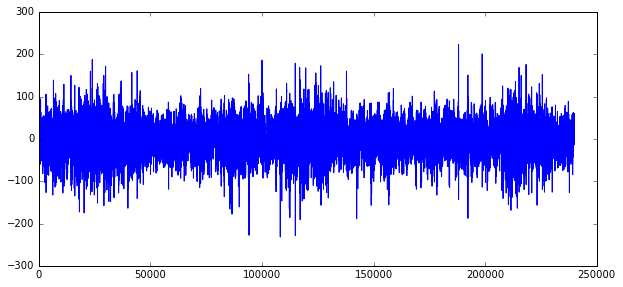

In [34]:
% matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

raw_sig.shape
sig = raw_sig[:,0,0]
plt.subplot(2,1,1)
plt.plot(sig)
plt.show()

for zero_value in raw_sig:
    for i in range(len(raw_sig[0,0,:])):
        if zero_value[:,i].all == (np.asarray([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])).all:
            print(zero_value[:,i])
            zero_value[:,i] =  (zero_value[:,i+1] + zero_value[:,i-1]) / 2

In [5]:
A=[[[1, 2],[3, 4]],[[5, 6],[7, 8]]]
for i in A:
    print(i)

[[1, 2], [3, 4]]
[[5, 6], [7, 8]]


In [27]:
x = raw_sig[0]
x[:, 0]
# y = np.asarray([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
# y.shape

array([  3.27575564,  24.06667709, -54.99739075,  -3.78955483,
       -19.48268318, -21.09876251,   6.14820957, -14.25691795,
       -17.06541061,  72.93850708, -18.98380661, -26.17956352,
        39.67823792,  22.50750732,  -8.21062088,  16.26460457])

## Following code extract features from signal using wavelet transform

In [21]:
def single_channel_dwt(sig):
#     input 240000
    coeffs = pywt.wavedec(sig, 'db1', level=6)
    cA2, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs
    return cD6

def multi_channel_dwt(sig):
#     input: 240000 * 16
#     return: k * 16
    F = []
    for s_sig in sig.T:
        cd = single_channel_dwt(s_sig)
        F.append(cd)
#     return np.asarray(F)
    return F

def feature_extraction(sig):
#     input: n * 240000 * 16
#     return: #files *channels * features
    FF = []
    for i in range(sig.shape[2]):
        F = multi_channel_dwt(raw_sig[:,:,1])
        FF.append(F)
    return FF

print(raw_sig.shape)
FF = feature_extraction(raw_sig) 

Y = []
for i,F in enumerate(FF):
    tmp = np.asarray(F)
    X = np.reshape(tmp,tmp.shape[0]*tmp.shape[1])
    Y.append(X)
print(len(Y[0]))

(240000, 16, 28)
60000


## Following code do dim reduction
Deepak can futher improve


In [22]:
from sklearn.manifold import TSNE
X = np.asarray(Y)
model = TSNE(n_components=6, random_state=0)
np.set_printoptions(suppress=True)
T = model.fit_transform(X)

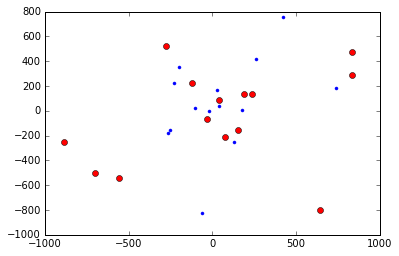

In [23]:
# from mpl_toolkits.mplot3d import Axes3D
# %pylab qt
%matplotlib inline

fig = plt.figure()
# ax = plt.axes(projection='3d')
for i,k in enumerate(label):
    if k=='0':
        plt.plot(T[i,0],T[i,1],'b.')
#         ax.scatter(T[i,0],T[i,1],T[i,2],c='b')
    else:
        plt.plot(T[i,0],T[i,1],'ro')
#         ax.scatter(T[i,0],T[i,1],T[i,2],c='r')

## Following code do clustering 
Deepak can to do this

## Following code do classification

In [24]:
#  Import any additional functionality you may need here
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from time import time
#  Set the number of training points
#num_train=
import pandas as pd
X_all = pd.DataFrame(T)
y_all = pd.DataFrame(label)

# Set the number of testing points
#num_test = X_all.shape[0] - num_train

#  Shuffle and split the dataset into the number of training and testing points above
rs = cross_validation.ShuffleSplit(28, n_iter=1,test_size=0.25, random_state=0)
for train_index, test_index in rs:
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X_all.loc[train_index,]
    X_test = X_all.loc[test_index,]
    y_train = y_all.loc[train_index,]
    y_test = y_all.loc[test_index,]

In [25]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    clf.fit(X_train, y_train)
   
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
#    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
 #   print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [26]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import grid_search
from sklearn.metrics import f1_score

clf_A1=grid_search.GridSearchCV(cv=3,estimator=LogisticRegression(C=1.0,penalty='l2'),
       param_grid={'C':[0.01,1]},n_jobs=-1)

clf_A1.fit(X_train,y_train)
print (clf_A1.best_params_)
print (clf_A1.best_score_)
train_predict(clf_A1, X_train, y_train, X_test, y_test)

IndexError: too many indices for array

In [ ]:
y_all[y_all==0]='no'
y_all[y_all==1]='yes'

In [ ]:
X_all